In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import  MinMaxScaler
import logging
import random
import numpy as np

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pickle
import seaborn as sns

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#import geopandas as gpd

In [3]:
#coastline = gpd.read_file("maltacoast/coastline_polygon.shp")

# Read Data

In [4]:
station = 'CSLB'

stations_sea_rms = pd.read_parquet(f"Processed Data/15.03.2025 Data/{station}.parquet")

#random seed for data splitting
randseed = 27

# Split Data

In [5]:
mlvariables = pd.DataFrame(stations_sea_rms)

X = mlvariables.loc[:, mlvariables.columns.str.startswith(station)] #input variable is columns that start with station name
Y = mlvariables.loc[:, ~mlvariables.columns.str.startswith(station) & (mlvariables.columns != 'sea_mode')] #target variable are the remaining columns
T = mlvariables.index.tolist() #Time series

In [6]:
mlvariables

,CSLB/Z/0.05-0.2,CSLB/Z/0.2-0.35,CSLB/Z/0.35-0.5,CSLB/Z/0.5-0.65,CSLB/Z/0.65-0.8,CSLB/Z/0.8-0.95,CSLB/Z/0.95-1.1,CSLB/Z/1.1-1.25,CSLB/Z/1.25-1.4,CSLB/Z/1.4-1.55,...,CSLB/E/1.7-1.85,CSLB/E/1.85-2.0,"(38.0625, 14.041667938232422)","(38.0625, 14.083335876464844)","(38.0625, 14.0)","(38.0625, 14.125)","(38.020835876464844, 13.916667938232422)",sea_mean,sea_median,sea_mode
index,,,,,,,,,,,,,,,,,,,,,
2019-08-09 08:00:00+00:00,4.889220e-08,3.769491e-08,3.182842e-08,1.618851e-08,1.132963e-08,8.115393e-09,6.637750e-09,4.684528e-09,3.996642e-09,2.276034e-09,...,1.194750e-09,1.058858e-09,0.333,0.336,0.329,0.340,0.299,0.3274,0.333,0.299
2019-08-09 09:00:00+00:00,4.941129e-08,3.884247e-08,3.167983e-08,1.704552e-08,1.532538e-08,9.366573e-09,6.768888e-09,4.687480e-09,4.199912e-09,2.494348e-09,...,1.149742e-09,9.844644e-10,0.372,0.373,0.371,0.374,0.347,0.3674,0.372,0.347
2019-08-09 10:00:00+00:00,5.090961e-08,3.748045e-08,2.940261e-08,1.579790e-08,1.249153e-08,8.438852e-09,6.195607e-09,3.896278e-09,3.601695e-09,2.234287e-09,...,1.109849e-09,9.084868e-10,0.372,0.372,0.372,0.372,0.350,0.3676,0.372,0.372
2019-08-09 11:00:00+00:00,5.203152e-08,3.714828e-08,2.842054e-08,1.659542e-08,1.219380e-08,7.909530e-09,5.759853e-09,3.743129e-09,3.370122e-09,2.116014e-09,...,1.034468e-09,9.378402e-10,0.368,0.368,0.368,0.367,0.349,0.3640,0.368,0.368
2019-08-09 12:00:00+00:00,4.338974e-10,1.685675e-10,1.073052e-10,7.824780e-11,6.226810e-11,5.117764e-11,4.392332e-11,3.806634e-11,3.392720e-11,3.032906e-11,...,1.458174e-11,1.344493e-11,0.361,0.361,0.362,0.360,0.346,0.3580,0.361,0.361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13 15:00:00+00:00,4.111343e-08,3.884490e-08,1.651008e-08,1.248506e-08,8.421261e-09,5.147430e-09,4.119938e-09,2.857756e-09,2.360750e-09,1.431042e-09,...,8.170677e-10,7.070007e-10,0.246,0.243,0.249,0.240,0.206,0.2368,0.243,0.206
2020-09-13 16:00:00+00:00,4.091428e-08,3.818299e-08,1.717891e-08,1.289199e-08,7.813863e-09,5.528412e-09,4.838036e-09,3.600802e-09,2.900660e-09,1.987983e-09,...,1.079452e-09,8.386511e-10,0.228,0.226,0.230,0.224,0.192,0.2200,0.226,0.192
2020-09-13 17:00:00+00:00,4.389795e-08,3.906860e-08,1.914360e-08,1.421749e-08,8.090117e-09,6.335500e-09,5.111137e-09,3.443809e-09,2.707728e-09,1.665816e-09,...,8.302970e-10,7.567836e-10,0.213,0.212,0.214,0.211,0.181,0.2062,0.212,0.181


In [7]:
#scale values between 0 and 1
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

#fit the scalers
scaler_x.fit(X) 
scaler_y.fit(Y)

MinMaxScaler()

In [8]:
#apply the scalers
Xscale = scaler_x.transform(X) 
Yscale = scaler_y.transform(Y)

In [9]:
#number of chunks in training/test set
nchunks = 40

#number of ks for kfold cross validation
kfolds = 5

lenchunk = round(Xscale.shape[0]/nchunks)

In [10]:
#Generates k-th datasets for Cross Validation 
list_of_dataset = [{'idx': [], 'XscaleTrain': [], 'YscaleTrain': [], 'XscaleTest': [], 'YscaleTest': []} for number in range(kfolds)]

In [11]:
#split data into 40 chunks (or nchunks)
all_chunks = np.array_split(np.arange(Xscale.shape[0]), nchunks)

#random shuffle of chunks
random.seed(randseed)
random.shuffle(all_chunks)

#this method only works if nchunks is perfectly divisible by kfolds (eg 40/5 = 8)
if nchunks % kfolds != 0:
    raise ValueError("Number of chunks must be divisible by number of folds.")

nchunks_per_fold = nchunks // kfolds

#assign chunks to folds
for i in range(kfolds):
    test_chunks = all_chunks[i*nchunks_per_fold : (i+1)*nchunks_per_fold] #separate date from chunk i=1: 0 to 7, i=2: 8 to 15...
    train_chunks = all_chunks[ : i*nchunks_per_fold] + all_chunks[(i+1)*nchunks_per_fold:] #one set for test set, remaining for training
    train_idx = np.concatenate(train_chunks)
    test_idx = np.concatenate(test_chunks)
    
    list_of_dataset[i]['idx'] = train_idx
    list_of_dataset[i]['XscaleTrain'] = Xscale[train_idx, :]
    list_of_dataset[i]['YscaleTrain'] = Yscale[train_idx, :]
    list_of_dataset[i]['XscaleTest'] = Xscale[test_idx, :]
    list_of_dataset[i]['YscaleTest'] = Yscale[test_idx, :]

In [12]:
len(list_of_dataset[0]['idx'])

7710

# Build and train RF Regressor

In [13]:
#analysis of results showed that for WDD, the best R2 and MAE were achieved for both sea_mean and sea_median on the same set of hyperparameters

# random forest maximum depth     
RF_max_depth = 10

# random forest number of estimators  
RF_n_estimators = 200

# random forest maximum features 
RF_max_features = 'log2'

# random forest min samples to split
RF_min_samples_split = 5

#random forest min samples per leaf
RF_min_samples_leaf = 3

In [14]:
RF_model = RandomForestRegressor(bootstrap = True,
                                 max_depth=RF_max_depth,
                                 n_estimators=RF_n_estimators,
                                 max_features= RF_max_features,
                                 min_samples_split = RF_min_samples_split,
                                 min_samples_leaf = RF_min_samples_leaf,
                                 verbose=1)

In [15]:
#Initiliaze the empty variables
Ypred = None
YTest = None

In [16]:
#Applies the learning/prediction to the k datasets
Ypred_kfold = []
YTest_kfold = []

for i, dic in enumerate(list_of_dataset):
    Ypred = None
    YTest = None
    
    #Fits the model to training data
    RF_model.fit(dic['XscaleTrain'], dic['YscaleTrain'])
    
    #Predicts the sea wave data by using the testing data
    ypred  = RF_model.predict(dic['XscaleTest'])
    
    #Inverts the scaling of the data and stores the results in the predicted/testing arrays
    Ypred = scaler_y.inverse_transform(ypred)
    YTest = scaler_y.inverse_transform(dic['YscaleTest'])
    
    #Append to kfold results
    Ypred_kfold.append(Ypred)
    YTest_kfold.append(YTest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.8s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    7.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

# Compute evaluation metrics and save data to parquet

In [35]:
results = []

#the names of the target variables are the last eight columns of the station data
target_names = mlvariables.columns[-8:-1].tolist()
for f in range(kfolds):
    Ypred = Ypred_kfold[f]
    YTest = YTest_kfold[f]

    #convert to df to save the data
    Ypred_df = pd.DataFrame(Ypred)
    YTest_df = pd.DataFrame(YTest)

    #save to parquet to preserve dat
    Ypred_df.to_parquet(f"results/kfold_data/{station}/fold{f}_Ypred.parquet", engine="pyarrow")
    YTest_df.to_parquet(f"results/kfold_data/{station}/fold{f}_YTest.parquet", engine="pyarrow")
    
    for i, target in enumerate(target_names):
        mae = mean_absolute_error(YTest[:, i], Ypred[:, i])
        mse = mean_squared_error(YTest[:, i], Ypred[:, i])
        rmse = np.sqrt(mse)
        r2 = r2_score(YTest[:, i], Ypred[:, i])
    
        #append the results as a row
        results.append([f, station, target, RF_max_depth, RF_n_estimators, RF_max_features, mae, mse, rmse, r2])

#creates results dataframe
results_df = pd.DataFrame(results, columns=["Fold", "Station", "Target Variable", "RF_max_depth", "RF_n_estimators", "RF_max_features", "MAE", "MSE", "RMSE", "R2"])

In [36]:
results_df

,Fold,Station,Target Variable,RF_max_depth,RF_n_estimators,RF_max_features,MAE,MSE,RMSE,R2
0,0,CSLB,"(38.0625, 14.041667938232422)",10,200,log2,0.164918,0.112092,0.334802,-0.028264
1,0,CSLB,"(38.0625, 14.083335876464844)",10,200,log2,0.166927,0.113518,0.336924,-0.018915
2,0,CSLB,"(38.0625, 14.0)",10,200,log2,0.162874,0.110321,0.332146,-0.036187
3,0,CSLB,"(38.0625, 14.125)",10,200,log2,0.168757,0.114661,0.338616,-0.008414
4,0,CSLB,"(38.020835876464844, 13.916667938232422)",10,200,log2,0.158528,0.098149,0.313287,-0.176158
5,0,CSLB,sea_mean,10,200,log2,0.163621,0.109277,0.330571,-0.050010
6,0,CSLB,sea_median,10,200,log2,0.165100,0.111694,0.334206,-0.026920
7,1,CSLB,"(38.0625, 14.041667938232422)",10,200,log2,0.151114,0.052884,0.229965,0.739709
8,1,CSLB,"(38.0625, 14.083335876464844)",10,200,log2,0.151936,0.053687,0.231705,0.730108
9,1,CSLB,"(38.0625, 14.0)",10,200,log2,0.149995,0.051921,0.227862,0.749177


# Evaluate k-fold results

In [37]:
sea_mean_results = results_df[(results_df["Target Variable"] == "sea_mean")]
sea_mean_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,10.0,200.0,0.145180,0.059167,0.236925,0.642036
std,1.581139,0.0,0.0,0.019956,0.030765,0.061577,0.393528
min,0.000000,10.0,200.0,0.112758,0.024956,0.157974,-0.050010
25%,1.000000,10.0,200.0,0.141376,0.051887,0.227788,0.731844
50%,2.000000,10.0,200.0,0.150255,0.052180,0.228430,0.755026
75%,3.000000,10.0,200.0,0.157890,0.057534,0.239862,0.883940
max,4.000000,10.0,200.0,0.163621,0.109277,0.330571,0.889382


In [38]:
sea_median_results = results_df[(results_df["Target Variable"] == "sea_median")]
sea_median_results.describe()

,Fold,RF_max_depth,RF_n_estimators,MAE,MSE,RMSE,R2
count,5.000000,5.0,5.0,5.000000,5.000000,5.000000,5.000000
mean,2.000000,10.0,200.0,0.146274,0.060352,0.239270,0.647546
std,1.581139,0.0,0.0,0.019949,0.031458,0.062268,0.383903
min,0.000000,10.0,200.0,0.113840,0.025466,0.159582,-0.026920
25%,1.000000,10.0,200.0,0.142599,0.053222,0.230698,0.731716
50%,2.000000,10.0,200.0,0.151544,0.053327,0.230926,0.757235
75%,3.000000,10.0,200.0,0.158284,0.058052,0.240939,0.885458
max,4.000000,10.0,200.0,0.165100,0.111694,0.334206,0.890243


# Plot some Data

In [39]:
#find the best performing fold
best_model_R2 = sea_mean_results.loc[sea_mean_results["R2"].idxmax()]
print(best_model_R2)

Fold                      2
Station                CSLB
Target Variable    sea_mean
RF_max_depth             10
RF_n_estimators         200
RF_max_features        log2
MAE                0.141376
MSE                 0.05218
RMSE                0.22843
R2                 0.889382
Name: 19, dtype: object


Set the best fold

In [40]:
bestfoldnum = 2

In [41]:
best_Ypred = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_Ypred.parquet")
best_YTest = pd.read_parquet(f"results/kfold_data/{station}/fold{bestfoldnum}_YTest.parquet")

In [42]:
# we need to find the index in date/time of the test set, as it was lost in transformation

#create the full list of indexes - for WDD there were 9421 rows of data
full_list = list(range(mlvariables.shape[0]))

#identify the numbers that are to be removed for bestfold
remove_list = list_of_dataset[bestfoldnum]['idx']

#remove the indexes that were part of the training set from the index
filtered_list = list(set(full_list) - set(remove_list))

#retrieve the index from the original dataframe mlvariables, to get date and time stamps
match_index = mlvariables.iloc[filtered_list].index

best_Ypred.index = match_index
best_YTest.index = match_index

#update the header
header = [
    (38.0625, 14.041667938232422),
    (38.0625, 14.083335876464844),
    (38.0625, 14.0),
    (38.0625, 14.125),
    (38.020835876464844, 13.916667938232422),
    "sea_mean",
    "sea_median"
]

best_Ypred.columns = header
best_YTest.columns = header

In [43]:
best_Ypred

,"(38.0625, 14.041667938232422)","(38.0625, 14.083335876464844)","(38.0625, 14.0)","(38.0625, 14.125)","(38.020835876464844, 13.916667938232422)",sea_mean,sea_median
index,,,,,,,
2019-08-19 09:00:00+00:00,0.201989,0.200817,0.203230,0.199668,0.182582,0.197657,0.200339
2019-08-19 10:00:00+00:00,0.198694,0.197365,0.200098,0.196065,0.179223,0.194289,0.196877
2019-08-19 11:00:00+00:00,0.202728,0.201349,0.204160,0.200013,0.182698,0.198190,0.200823
2019-08-19 12:00:00+00:00,0.200779,0.199252,0.202416,0.197773,0.180869,0.196218,0.198761
2019-08-19 13:00:00+00:00,0.219235,0.217493,0.221033,0.215835,0.195730,0.213865,0.216974
...,...,...,...,...,...,...,...
2020-07-05 12:00:00+00:00,0.328863,0.329996,0.327448,0.330937,0.285112,0.320471,0.327446
2020-07-05 13:00:00+00:00,0.339383,0.340472,0.338047,0.341365,0.295557,0.330965,0.337878
2020-07-05 14:00:00+00:00,0.326924,0.327978,0.325631,0.328866,0.283276,0.318535,0.325424


In [44]:
best_YTest

,"(38.0625, 14.041667938232422)","(38.0625, 14.083335876464844)","(38.0625, 14.0)","(38.0625, 14.125)","(38.020835876464844, 13.916667938232422)",sea_mean,sea_median
index,,,,,,,
2019-08-19 09:00:00+00:00,0.209,0.208,0.210,0.207,0.179,0.2026,0.208
2019-08-19 10:00:00+00:00,0.199,0.198,0.200,0.197,0.170,0.1928,0.198
2019-08-19 11:00:00+00:00,0.198,0.196,0.199,0.195,0.171,0.1918,0.196
2019-08-19 12:00:00+00:00,0.226,0.222,0.230,0.219,0.206,0.2206,0.222
2019-08-19 13:00:00+00:00,0.267,0.261,0.274,0.255,0.239,0.2592,0.261
...,...,...,...,...,...,...,...
2020-07-05 12:00:00+00:00,0.286,0.292,0.280,0.297,0.224,0.2758,0.286
2020-07-05 13:00:00+00:00,0.287,0.292,0.281,0.297,0.227,0.2768,0.287
2020-07-05 14:00:00+00:00,0.287,0.292,0.281,0.297,0.230,0.2774,0.287


In [45]:
best_Ypred.index = best_Ypred.index.tz_convert(None)
best_YTest.index = best_YTest.index.tz_convert(None)

In [46]:
print(best_YTest.index.tolist())

[Timestamp('2019-08-19 09:00:00'), Timestamp('2019-08-19 10:00:00'), Timestamp('2019-08-19 11:00:00'), Timestamp('2019-08-19 12:00:00'), Timestamp('2019-08-19 13:00:00'), Timestamp('2019-08-19 14:00:00'), Timestamp('2019-08-19 15:00:00'), Timestamp('2019-08-19 16:00:00'), Timestamp('2019-08-19 17:00:00'), Timestamp('2019-08-19 18:00:00'), Timestamp('2019-08-19 19:00:00'), Timestamp('2019-08-19 20:00:00'), Timestamp('2019-08-19 21:00:00'), Timestamp('2019-08-19 22:00:00'), Timestamp('2019-08-19 23:00:00'), Timestamp('2019-08-20 00:00:00'), Timestamp('2019-08-20 01:00:00'), Timestamp('2019-08-20 02:00:00'), Timestamp('2019-08-20 03:00:00'), Timestamp('2019-08-20 04:00:00'), Timestamp('2019-08-20 05:00:00'), Timestamp('2019-08-20 06:00:00'), Timestamp('2019-08-20 07:00:00'), Timestamp('2019-08-20 08:00:00'), Timestamp('2019-08-20 09:00:00'), Timestamp('2019-08-20 10:00:00'), Timestamp('2019-08-20 11:00:00'), Timestamp('2019-08-20 12:00:00'), Timestamp('2019-08-20 13:00:00'), Timestamp('20

#best_Ypred.to_csv(f"results/kfold_data/{station}/bestYpred.csv")

2019-08-21 14:00:00
2020-01-10 03:00:00
2020-03-01 12:00:00
2020-07-05 02:00:00


Text(0.5, 0.98, 'Plots of estimated SWH around station CSLB for various time intervals')

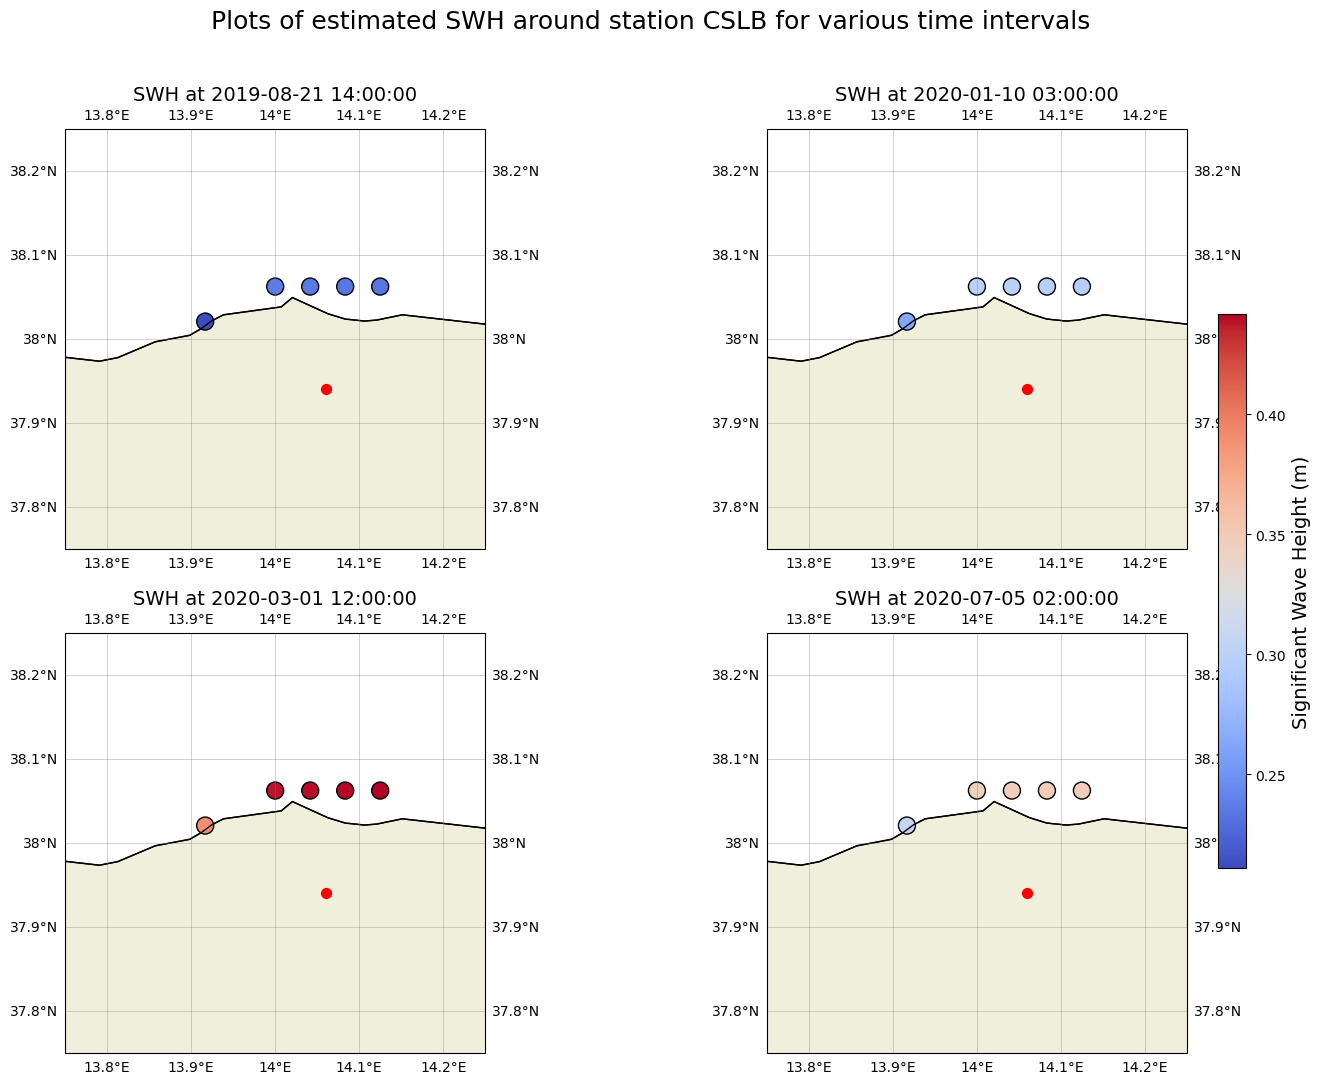

In [47]:
#Plot four timestamps in four subplots
best_Ypred.index = pd.to_datetime(best_Ypred.index)

selected_timestamps = [
    pd.to_datetime("2019-08-21 14:00:00"),
    pd.to_datetime("2020-01-10 03:00:00"),
    pd.to_datetime("2020-03-01 12:00:00"),
    pd.to_datetime("2020-07-05 02:00:00")
]

timestamps_to_plot = best_Ypred.loc[selected_timestamps]

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [13.75, 14.25, 37.75, 38.25]

#create the subplots
for timestamp, ax in zip(timestamps_to_plot.index, axes.flat):
    print(timestamp)

    #set map extent
    ax.set_extent(map_extent, crs=ccrs.PlateCarree())

    #add map features
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    #plot seismic stations
    ax.scatter(14.06, 37.94, color='red', marker='o', s=50, label='Seismic Stations')

    #get wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp, :]
    wave_heights = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords = wave_heights.index.to_list() #get the coordinates of the gridpoints
    lons, lats = zip(*coords)
    heights = wave_heights.values

    #scatter plot of wave heights
    sc = ax.scatter(lats, lons, c=heights, cmap='coolwarm', edgecolor='black', s=150, vmin=timestamps_to_plot.min().min(), vmax=timestamps_to_plot.max().max())

    #add title
    ax.set_title(f"SWH at {timestamp}", fontsize=14)

    #add gridlines
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

#colourbar
cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
cbar.set_label("Significant Wave Height (m)", fontsize=14)

fig.suptitle(f"Plots of estimated SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

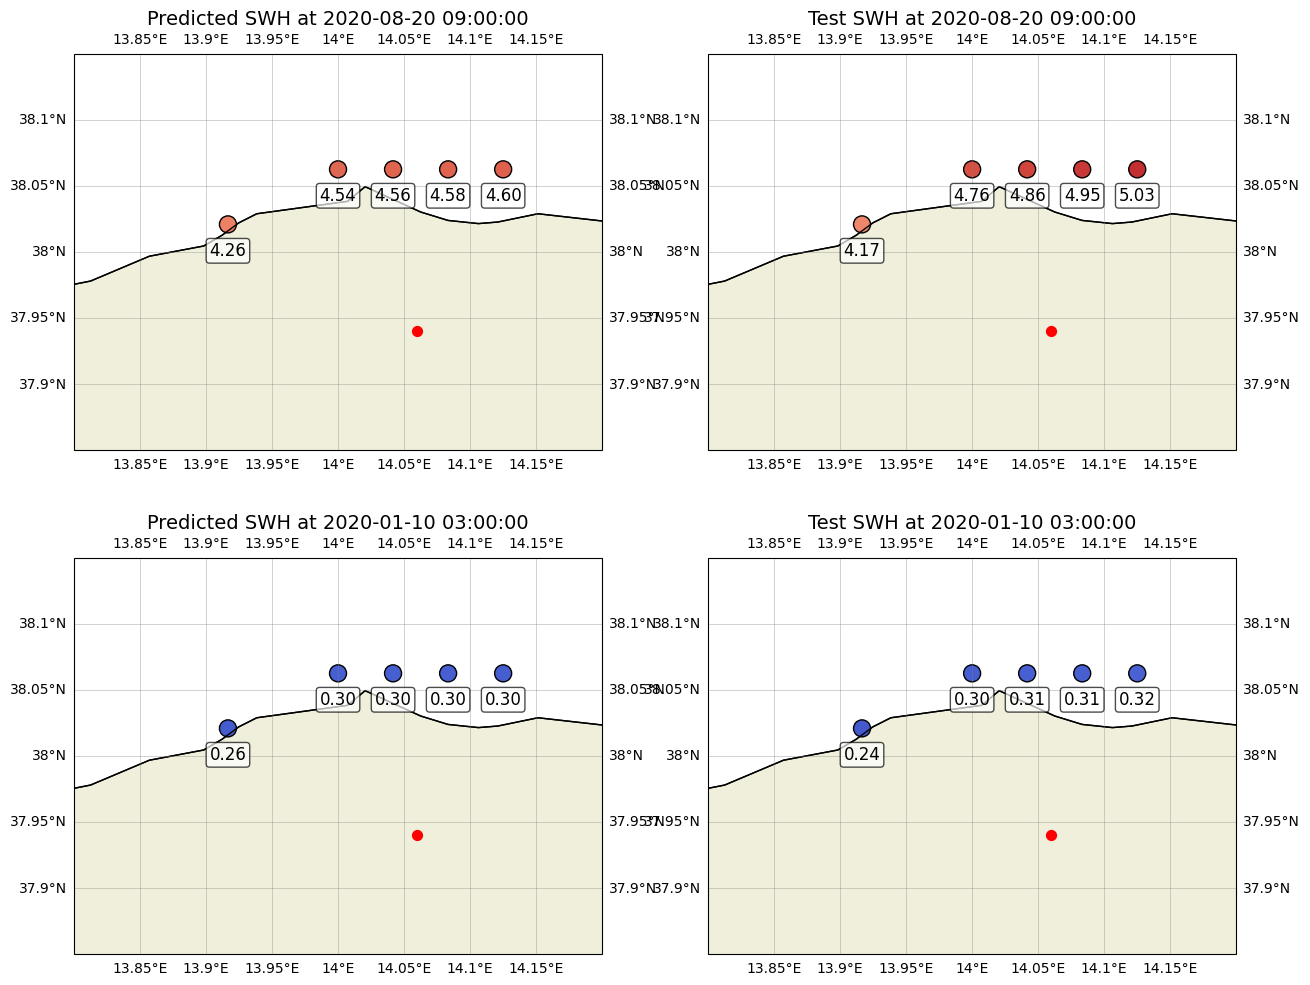

In [55]:
#Plot two timestamps in four subplots - one for pred and one for test for each timestamp
best_Ypred.index = pd.to_datetime(best_Ypred.index)
best_YTest.index = pd.to_datetime(best_YTest.index)

selected_timestamps = [
    pd.to_datetime("2020-08-20 09:00:00"),
    pd.to_datetime("2020-01-10 03:00:00")
]

timestamps_to_plot_pred = best_Ypred.loc[selected_timestamps]
timestamps_to_plot_test = best_YTest.loc[selected_timestamps]

#global min and max to give a consistent colour scale across all the subplots - first five cols contain SWH
vmin = min(best_Ypred.iloc[:, :5].min().min(), best_YTest.iloc[:, :5].min().min())
vmax = max(best_Ypred.iloc[:, :5].max().max(), best_YTest.iloc[:, :5].max().max())

#create the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12), subplot_kw={'projection': ccrs.PlateCarree()})

#set map extent [west, east, south, north]
map_extent = [13.8, 14.2, 37.85, 38.15]

for idx, (timestamp_pred, timestamp_test) in enumerate(zip(timestamps_to_plot_pred.index, timestamps_to_plot_test.index)):
    ax_pred, ax_test = axes[idx, 0], axes[idx, 1]
    
    #set map extent
    ax_pred.set_extent(map_extent, crs=ccrs.PlateCarree())
    ax_test.set_extent(map_extent, crs=ccrs.PlateCarree())
    
    #add map features
    for ax in [ax_pred, ax_test]:
        ax.add_feature(cfeature.LAND, edgecolor='black')
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.scatter(14.06, 37.94, color='red', marker='o', s=50, label='Seismic Stations')
        ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

    #get PREDICTED wave height data for this timestamp
    best_timestamp = best_Ypred.loc[timestamp_pred, :]
    wave_heights_pred = best_timestamp.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_pred = wave_heights_pred.index.to_list() #get the coordinates of the gridpoints
    lons_pred, lats_pred = zip(*coords_pred)
    heights_pred = wave_heights_pred.values
    
    #scatter plot for predicted wave heights
    sc_pred = ax_pred.scatter(lats_pred, lons_pred, c=heights_pred, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_pred.set_title(f"Predicted SWH at {timestamp_pred}", fontsize=14)

    for lat, lon, height in zip(lats_pred, lons_pred, heights_pred):
        ax_pred.text(lat, lon-0.02, f"{height:.2f}", fontsize=12, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

    #get TEST wave height data for this timestamp
    best_timestamp_Test = best_YTest.loc[timestamp_test, :]
    wave_heights_test = best_timestamp_Test.iloc[:5] #first 5 columns have the SWH for the gridpoints
    coords_test = wave_heights_test.index.to_list() #get the coordinates of the gridpoints
    lons_test, lats_test = zip(*coords_test)
    heights_test = wave_heights_test.values

    #scatter plot for test wave heights
    sc_test = ax_test.scatter(lats_test, lons_test, c=heights_test, cmap='coolwarm', edgecolor='black', s=150, 
                              vmin=vmin, vmax=vmax)
    ax_test.set_title(f"Test SWH at {timestamp_test}", fontsize=14)

    for lat, lon, height in zip(lats_test, lons_test, heights_test):
        ax_test.text(lat, lon-0.02, f"{height:.2f}", fontsize=12, color='black', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.2'))

#colourbar
#cbar = fig.colorbar(sc, ax=axes, orientation='vertical', shrink=0.6, pad=0.02)
#cbar.set_label("Significant Wave Height (m)", fontsize=14)

#fig.suptitle(f"Plots of estimated and actual SWH around station {station} for various time intervals",fontsize=18)

#plt.savefig('barcharts/bestMAE/sea_median/bestMAE_median_plot.png', bbox_inches='tight')

#plt.show()

# Time Series

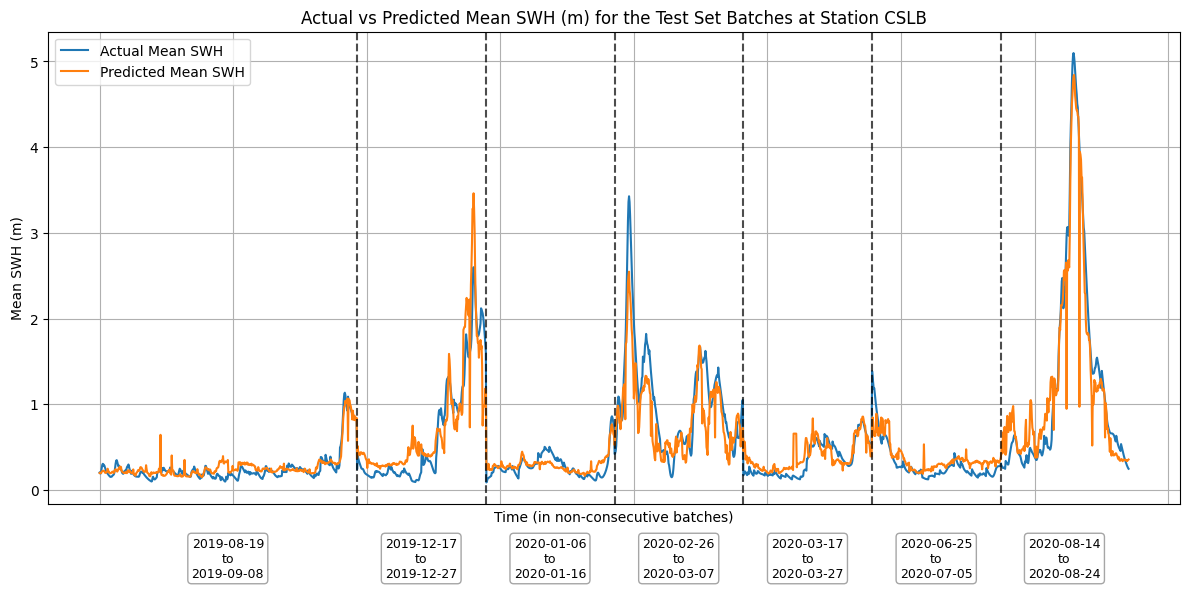

In [57]:
best_YTest.index = pd.to_datetime(best_YTest.index)
best_Ypred.index = pd.to_datetime(best_Ypred.index)

#YTest and Ypred share the same index
sea_mean_df = pd.DataFrame({'Actual': best_YTest.loc[best_Ypred.index, 'sea_mean'],
                            'Predicted': best_Ypred.loc[best_Ypred.index, 'sea_mean']
                           })

#reset the index to plot skipped parts where there is no data
sea_mean_df = sea_mean_df.reset_index()
sea_mean_df.rename(columns={'index': 'Timestamp'}, inplace=True)
sea_mean_df = sea_mean_df.sort_values('Timestamp').reset_index(drop=True)

#find when time gap is greater than 2 hours
time_deltas = sea_mean_df['Timestamp'].diff().dt.total_seconds() / 3600 #convert to hours
vline_spacing = time_deltas[time_deltas >= 2].index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(sea_mean_df.index, sea_mean_df['Actual'], label='Actual Mean SWH')
ax.plot(sea_mean_df.index, sea_mean_df['Predicted'], label='Predicted Mean SWH')

#plot vertical lines
for x in vline_spacing:
    ax.axvline(x=x, color='black', alpha=0.7, linestyle='--')

#get xlabels
chunk_ends = [vline_spacing[0]-1] + [vline_spacing[j+1]-1 for j in range(len(vline_spacing)-1)] + [len(sea_mean_df)-1]
chunk_starts = [0] + vline_spacing

for start, end in zip(chunk_starts, chunk_ends):
    midpoint = (start + end) // 2
    start_time = sea_mean_df.loc[start, 'Timestamp'].strftime('%Y-%m-%d')
    end_time = sea_mean_df.loc[end, 'Timestamp'].strftime('%Y-%m-%d')
    label = f"{start_time}\nto\n{end_time}"

    ax.text(midpoint, -0.07, label, transform=ax.get_xaxis_transform(),
            ha='center', va='top', fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='gray', alpha=0.7))
    
#switch off default x ticks, major and minor, from the bottom and the top and remove xlabels
plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)

plt.xlabel("Time (in non-consecutive batches)")
plt.ylabel("Mean SWH (m)")
plt.title(f"Actual vs Predicted Mean SWH (m) for the Test Set Batches at Station {station}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()